# Project R3 - Parkinson's Disease using Decision Tree

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased
dopamine levels in the brain. It manifests itself through a deterioration of movement, including
the presence of tremors and stiffness. There is commonly a marked effect on speech, including
dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced
pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of
the patient and observing motor skills in various situations. Since there is no definitive
laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when
motor effects are not yet severe. Monitoring progression of the disease over time requires
repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features,
voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms
could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available
at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/
The data consists of those diagnosed with Parkinson Disease and those who do not.


# Importing all the libraries necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

# Question 1:  
Load the dataset

In [2]:
park_df = pd.read_csv("parkinsons.data")
park_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Question 2:  
It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general
idea of likely challenges in the dataset. (2.5 points)

In [3]:
park_df.columns.value_counts().sum()

24

In [4]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

There are 24 features in the dataset with 195 not null values. The datatype of all the columns is float/int except the name column.

# Question 3:

Using univariate & bivariate analysis to check the individual attributes for their basic
statistic such as central values, spread, tails etc. What are your observations? (15
points)

In [5]:
park_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

As we can see that out of 195 values in status column the patients with parkinson's disease that is denoted by 1 significantly outnumber healthy patients which do not have parkinson's disease and are denoted by 0.

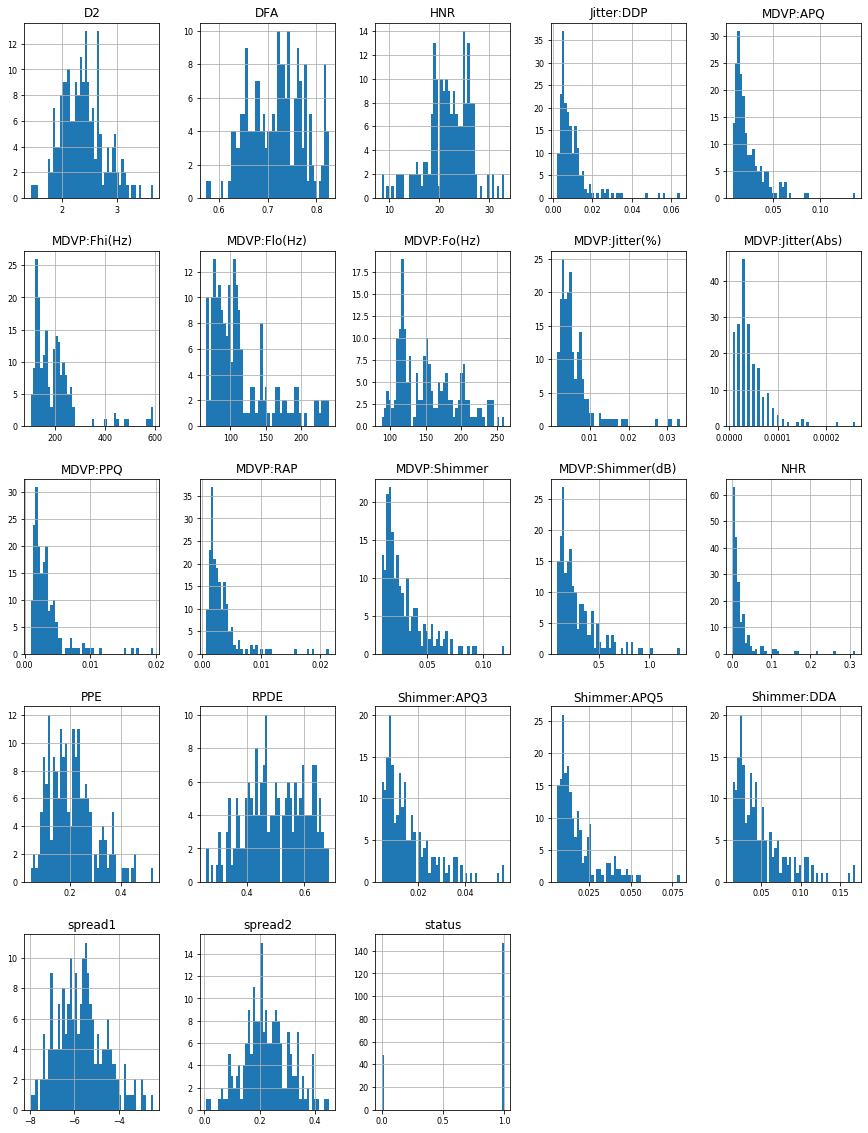

In [20]:
# Distribution for each variable

park_df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

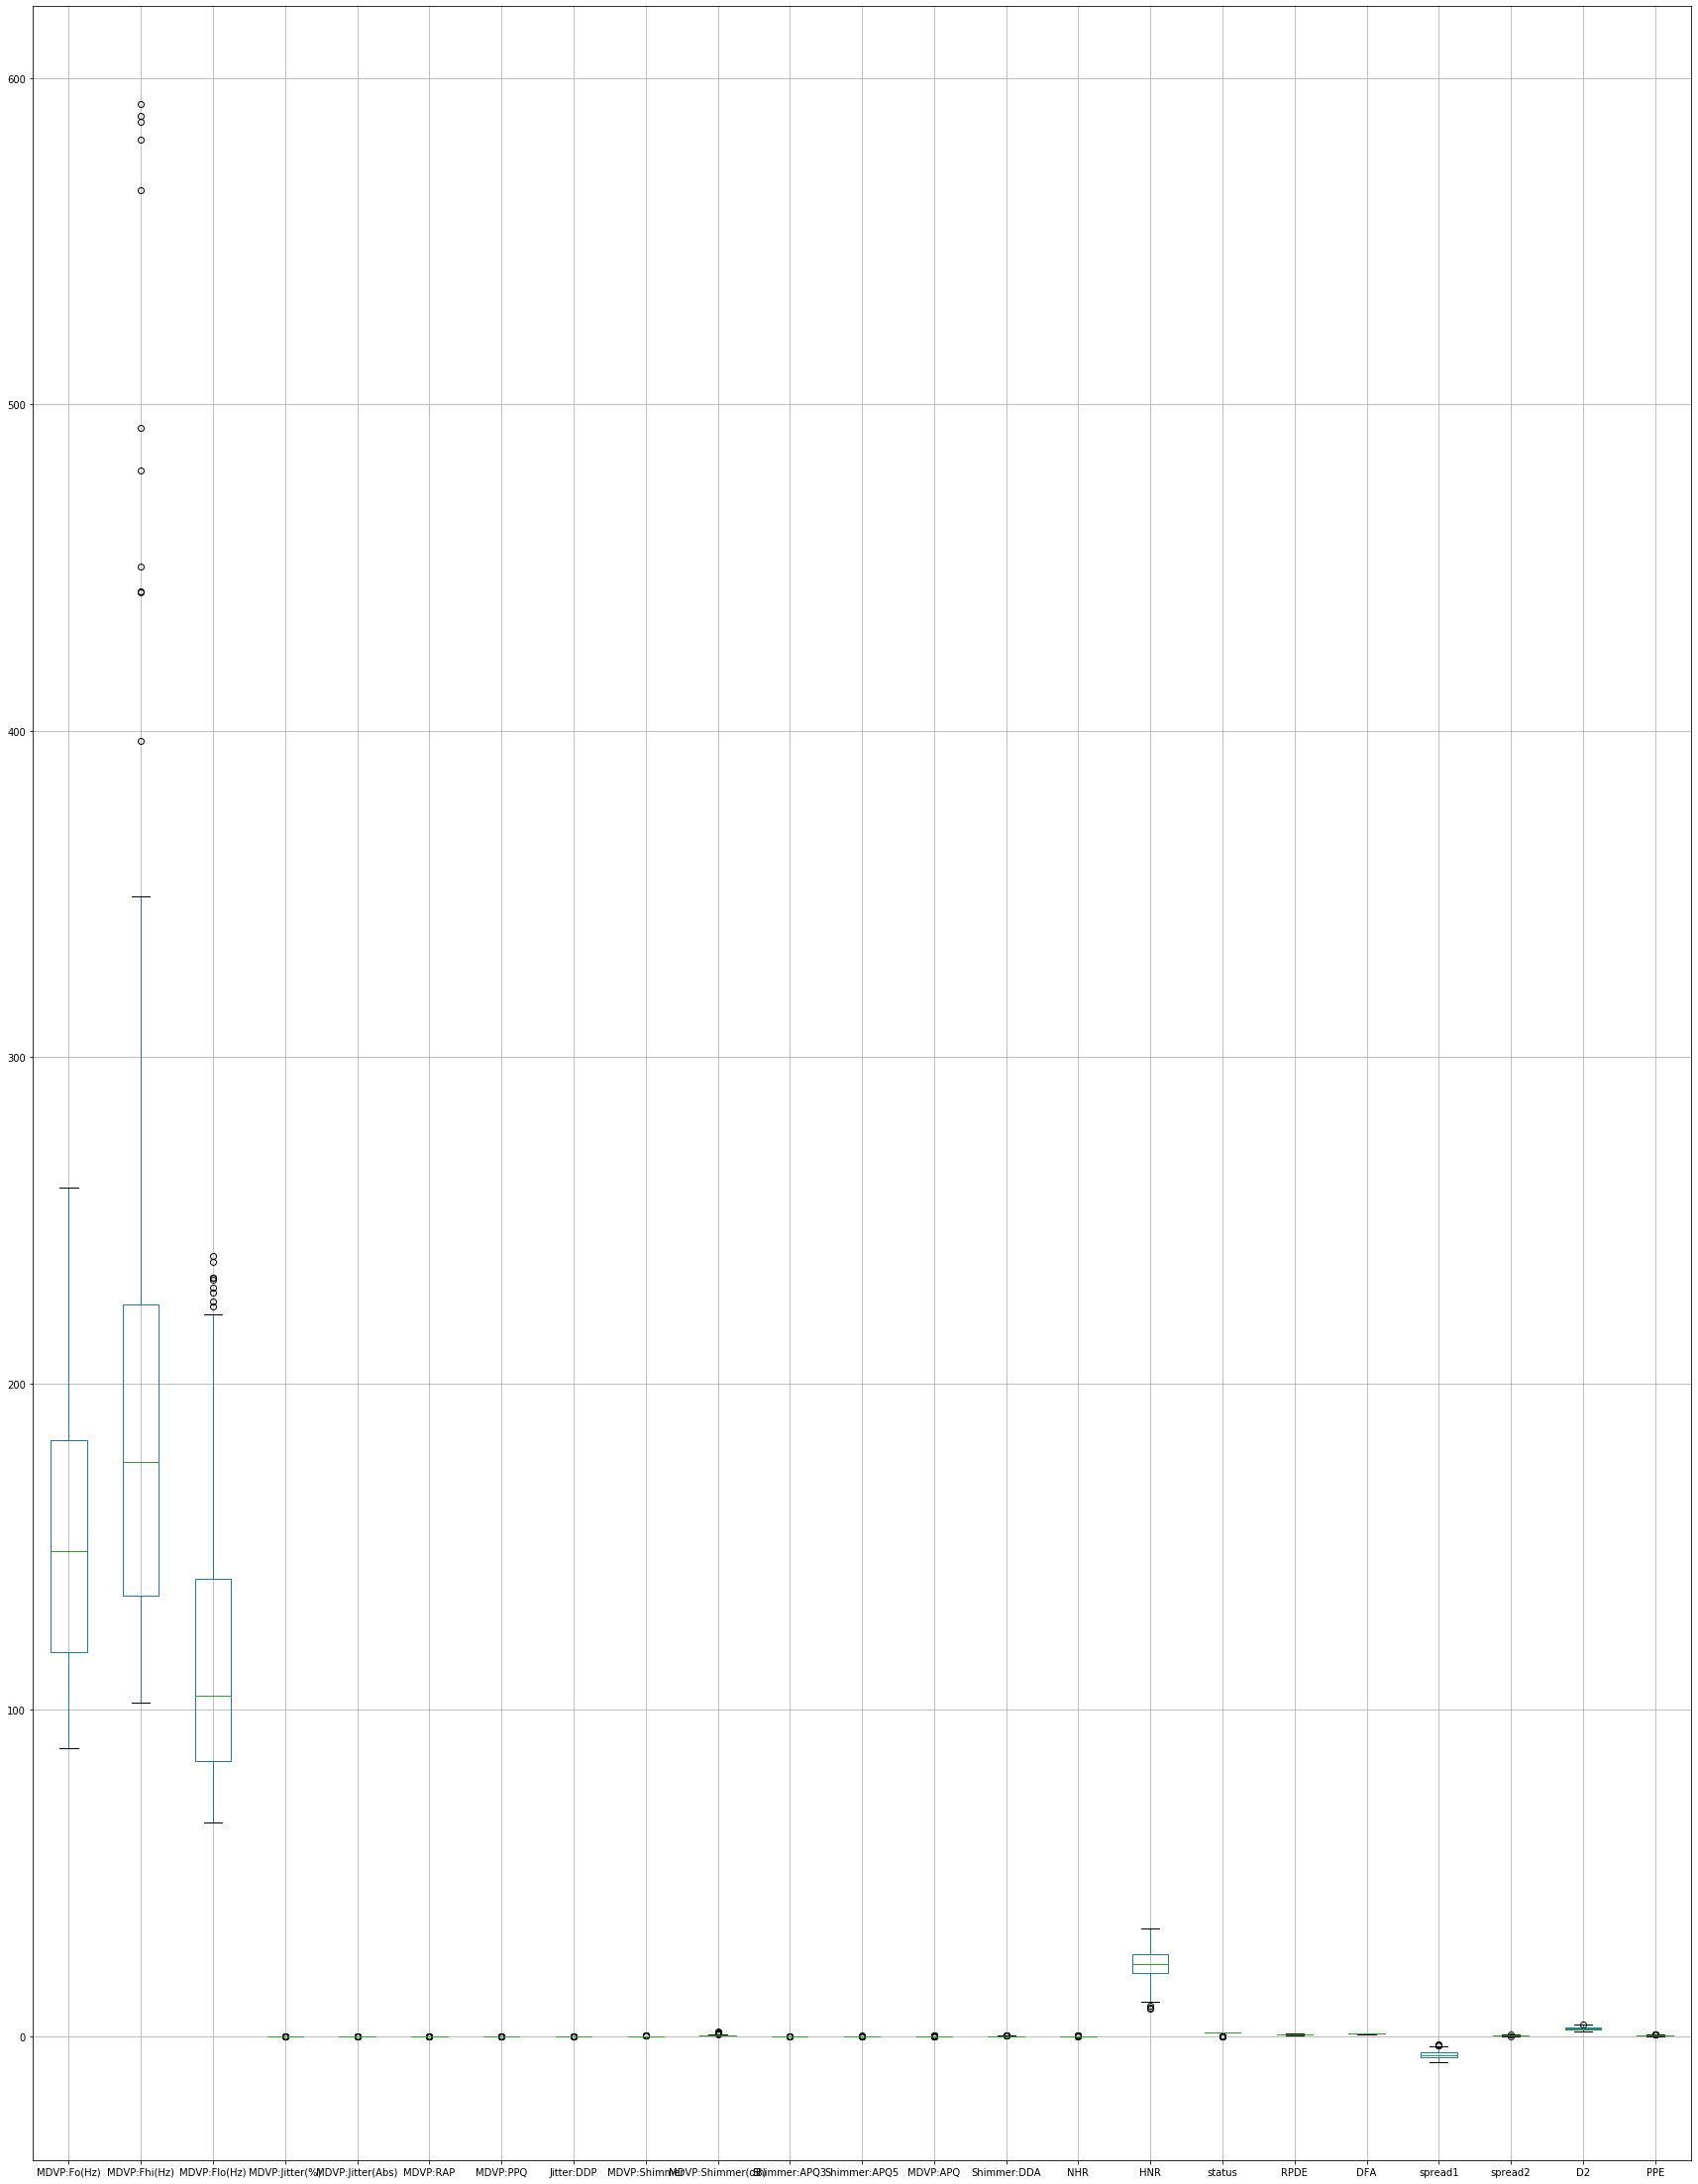

In [7]:
park_df.boxplot(figsize = (30,40))

In [8]:
park_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


# Insights

1) From the histogram we could infer D2, Spread2, Spread1, DFA have distribution close to what we call normal distribution.

2) MDVP:PPQ, MDVP:RAP, Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA all are right skewed.

3) From the correlation matrix above we could infer that none of the feature have good correlation with that of the target columns "Status", with maximum beaing Sprea1 with posotive correlation of 56.

4) There are outliers in the data for some columns as we can see with the box plot, but decision tree can handle outliers and does not get affected by it so hence not handling them.

5) As we are going to make a decision tree model it does not get affected by un scalled data like Linear Regression which calculates euclidiean distances.

# Question 4:

Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [9]:
X = park_df.drop(['status','name'], axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
Y = park_df['status']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [11]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print (X_train.shape)
print (x_test.shape)
print (Y_train.shape)
print (y_test.shape)

(136, 22)
(59, 22)
(136,)
(59,)


# Question 5:

Create the model using “entropy” method of reducing the entropy and fit it to training
data.

In [12]:
Decision_Tree_Model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
Decision_Tree_Model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [52]:
Train_Accuracy_Before_GS = Decision_Tree_Model.score(X_train , Y_train)
Train_Accuracy_Before_GS

1.0

We could see the model seems to be overfitting on the training data

# Question 6:

Test the model on test data and what is the accuracy achieved. Capture the predicted
values and do a crosstab. (7.5 points)

In [48]:
Predict_PD = Decision_Tree_Model.predict(x_test)
Predict_PD

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [53]:
Test_Accuracy_Before_GS = accuracy_score(y_test, Predict_PD)
Test_Accuracy_Before_GS

0.864406779661017

Confusion Matrix

In [17]:
print(metrics.confusion_matrix(y_test, Predict_PD))

[[12  7]
 [ 1 39]]


Classification Report

In [18]:
print(metrics.classification_report(y_test, Predict_PD))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



Crosstab

In [19]:
pd.crosstab(y_test, Predict_PD,margins = True)

col_0,0,1,All
status,,,
0,12,7,19
1,1,39,40
All,13,46,59


# Question 7:

Use regularization parameters of max_depth, min_sample_leaf to recreate the model.
What is the impact on the model accuracy? How does regularization help? (20 points) 

In [68]:
Decision_Tree_Model_GS = DecisionTreeClassifier(criterion='entropy', random_state = 1)
param_grid = {'max_depth': np.arange(3, 10),"min_samples_leaf": np.arange(3, 10)}
Grid_Search_DT = GridSearchCV(Decision_Tree_Model_GS, param_grid=param_grid)
Grid_Search_DT.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6,

In [65]:
#Grid_Search_DT.best_params_
#Grid_Search_DT.best_estimator_
#Grid_Search_DT.cv_results_['params']

In [69]:
Grid_Search_DT.score(X_train , Y_train)

0.9191176470588235

In [70]:
GS_Predict_PD = Grid_Search_DT.predict(x_test)
Test_Accuracy_After_GS = accuracy_score(y_test, GS_Predict_PD)
Test_Accuracy_After_GS

0.847457627118644

# Inference

Though we could see that the test accuracy has reduced from 86.4 to 84.7 even after we put in regularization and putting in the optimal values 'max_depth' and 'min_samples_leaf' it seems to be not helping that much, but there is one more inference to be drawn the model seems to be btter trained now and is not a overfit on the training data which we could see from the training accuracy which has reduced from 100 percent to 91 percent.

# Question 8:

Next implement the decision tree using Random Forest. What is the optimal number of
trees that gives the best result?

# Random Forest

In [90]:
RF_model = RandomForestClassifier(n_estimators=10, criterion='entropy',max_depth = 6, max_features= 12, random_state = 1)
param_grid_rf = {"n_estimators": np.arange(3, 100)}
gs_rf = GridSearchCV(RF_model, param_grid_rf)
gs_rf.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=6,
                                              max_features=12,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False...
             param_grid={'n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28,

In [91]:
gs_rf.best_params_

{'n_estimators': 44}

In [92]:
gs_rf.score(X_train , Y_train)

1.0

In [93]:
GS_RF_Predict_PD = Grid_Search_DT.predict(x_test)
Test_Accuracy_After_GS_RF = accuracy_score(y_test, GS_RF_Predict_PD)
Test_Accuracy_After_GS_RF

0.847457627118644

# Inference

Optimal number of trees which give the best result is 44